In [8]:
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format
DATASET_BASE_PATH = "C:/Users/guibs/Documents/GitHub/SGD/PROJ2/DataSets"

In [9]:
AQ2019=pd.read_csv(f"{DATASET_BASE_PATH}/AQ2019.csv")
AQ2020=pd.read_csv(f"{DATASET_BASE_PATH}/AQ2020.csv")
AQ2021=pd.read_csv(f"{DATASET_BASE_PATH}/AQ2021.csv")
#CD=pd.read_excel(f"{DATASET_BASE_PATH}/Covid.xlsx")
#VD=pd.read_csv(f"{DATASET_BASE_PATH}/Vaccination.xlsx")

#Merge Air quality DataSets
AQ = pd.concat([AQ2019,AQ2020,AQ2021])
AQ.to_csv("C:/Users/guibs/Documents/GitHub/SGD/PROJ2/DataSets/AQ.csv")

In [10]:
#CD.head()
#VD.head()

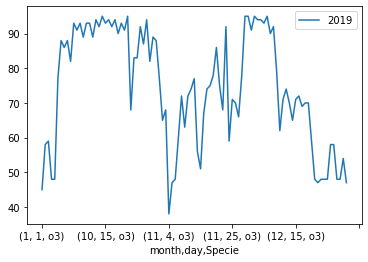

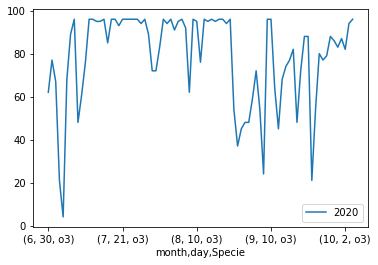

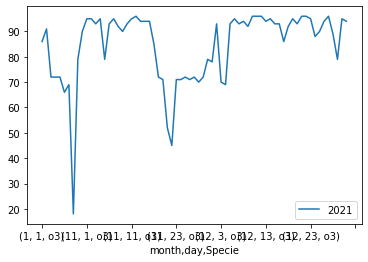

In [46]:
##Example of show by country
#print(AQ[AQ['Country']=='PT'])
##Example of show by city
#print(AQ[AQ['City']=='Lisbon'])

AQ2019['month'] = pd.to_datetime(AQ2019['Date']).dt.month
AQ2020['month'] = pd.to_datetime(AQ2020['Date']).dt.month
AQ2021['month'] = pd.to_datetime(AQ2021['Date']).dt.month
AQ2019['day'] = pd.to_datetime(AQ2019['Date']).dt.day
AQ2020['day'] = pd.to_datetime(AQ2020['Date']).dt.day
AQ2021['day'] = pd.to_datetime(AQ2021['Date']).dt.day

LisbonAQ19 = AQ2019[\
        (AQ2019['City'] == 'Lisbon') &
        (AQ2019['Specie'] == 'pm25')
    ]
LisbonAQ20 = AQ2020[\
        (AQ2020['City'] == 'Lisbon') &
        (AQ2020['Specie'] == 'pm25')
    ]
LisbonAQ21 = AQ2021[\
        (AQ2021['City'] == 'Lisbon') &
        (AQ2021['Specie'] == 'pm25')
    ]

#print(LisbonAQ19)
LisbonAQ19 = LisbonAQ19.groupby(['month','day','Specie']).agg({'count': 'median'})
LisbonAQ20 = LisbonAQ20.groupby(['month','day','Specie']).agg({'count': 'median'})
LisbonAQ21 = LisbonAQ21.groupby(['month','day','Specie']).agg({'count': 'median'})
LisbonAQ19.plot()
plt.legend(["2019"])
LisbonAQ20.plot()
plt.legend(["2020"])
LisbonAQ21.plot()
plt.legend(["2021"])